# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from ucimlrepo import list_available_datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score
from sklearn.decomposition import PCA

# Load dataset 

## Iris dataset 

In [2]:
iris = fetch_ucirepo(id=53) 
features = iris.data.features 
target = iris.data.targets

In [3]:
print(iris.metadata) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [4]:
X = pd.DataFrame(features, columns=iris.data.feature_names)
y = pd.DataFrame(target, columns=iris.data.target_names)

## UCIMLREPO Datasets 

In [5]:
all_datasets = list_available_datasets()
print(all_datasets)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

# Data Preprocessing 

## 1- Understand the data

In [6]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
print(X.isnull().sum()) 
print(X.duplicated().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64
3


In [10]:
y['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 2- Labeling the data 

In [11]:
label = {'Iris-setosa': 0 , 'Iris-versicolor' : 1, 'Iris-virginica': 2}
y['class'] = y['class'].map(label)

## 3- Reduce dimensions for visualization


In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Data Visualization

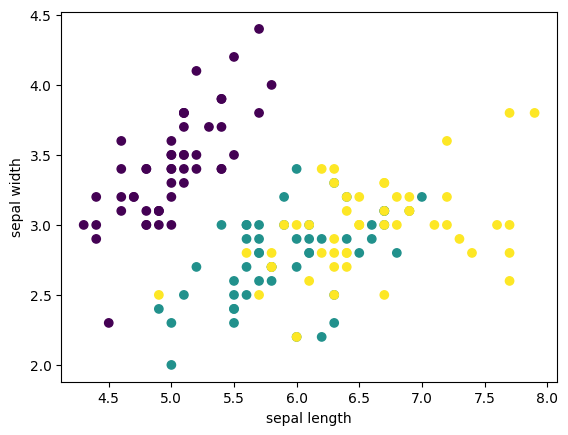

In [13]:
plt.scatter(X['sepal length'], X['sepal width'], c=y['class'], cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

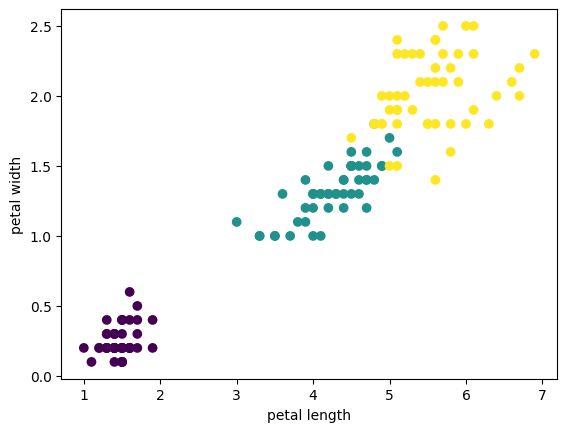

In [14]:
plt.scatter(X['petal length'], X['petal width'], c=y['class'] , cmap='viridis')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

# ML Model 

## 1- K-Means 

In [15]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X) 

c:\Users\Asmaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Asmaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Asmaa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asmaa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

## 2- GMM

In [16]:
gmm_model = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm_model.fit_predict(X)

# Model Evaluation 

In [18]:
# Evaluation metrics
def evaluate_clustering(true_labels, predicted_labels, name):
    print(f"\n{name} Clustering Evaluation:")
    print("Adjusted Rand Index:", adjusted_rand_score(true_labels, predicted_labels))
    print("Silhouette Score:", silhouette_score(X, predicted_labels))
    print("Homogeneity Score:", homogeneity_score(true_labels, predicted_labels))

evaluate_clustering(np.ravel(y.values), kmeans_labels, "K-Means")
evaluate_clustering(np.ravel(y.values), gmm_labels, "GMM")



K-Means Clustering Evaluation:
Adjusted Rand Index: 0.7163421126838476
Silhouette Score: 0.5509643746707443
Homogeneity Score: 0.7364192881252849

GMM Clustering Evaluation:
Adjusted Rand Index: 0.9038742317748124
Silhouette Score: 0.5009470350205055
Homogeneity Score: 0.8983263672602775


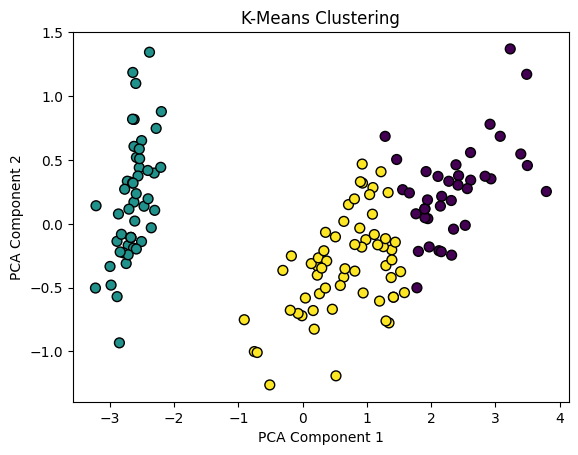

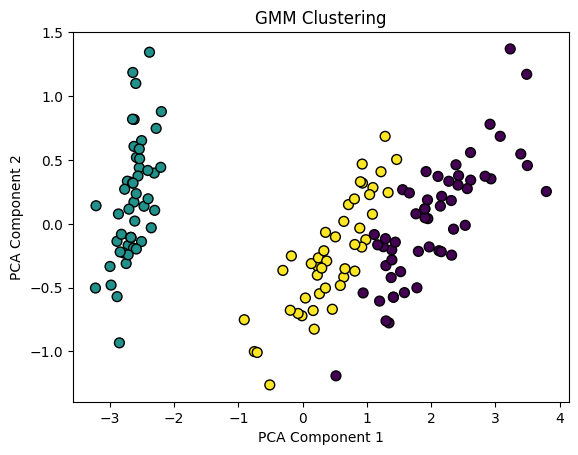

In [ ]:
# Visualization
def plot_clusters(X_reduced, labels, title):   
    plt.figure()
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

plot_clusters(X_pca, kmeans_labels, "K-Means Clustering")
plot_clusters(X_pca, gmm_labels, "GMM Clustering")